In [23]:
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
get_ipython().magic(u'pylab inline')
a=pd.read_excel("C:/Users/user/Desktop/INTERNSHIP/WIND_SINGRAULI/COMBINED/06.xlsx",Header='None')

a.set_index=pd.to_datetime(a['Date'])
a.columns
Date=list(a['Date'])
Values=list(a['Values'])
b=pd.DataFrame({'Date':Date,'Values':Values})
b['Date']=pd.to_datetime(b['Date'])
b.set_index(b['Date'],inplace='True')
del b
ts=pd.Series(Values,index=pd.to_datetime(Date))
a=ts['2017-06']
b=a['2017-06-04 00:00:00 ':]

Populating the interactive namespace from numpy and matplotlib


Series([], dtype: float64)

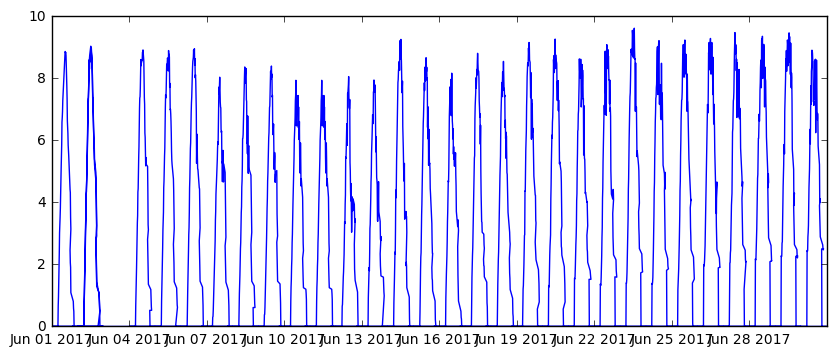

In [50]:

plt.figure(figsize=(10,4))
plt.plot(a)


In [82]:
from sklearn.metrics import mean_squared_error
import math
m=b.size
print 96*4
print b.size
k=b.size-96*4
print k
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    

dataset= a[0:2496]
validation=a[2496:]


384
2497
2113


In [31]:
# create a differenced series
def difference(dataset, interval=96):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)


# In[5]:

# invert differenced value
def inverse_difference(history, yhat, interval=96):
	return yhat + history[-interval]


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2016
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -327.406
Method:                       css-mle   S.D. of innovations              0.285
Date:                Wed, 05 Jul 2017   AIC                            662.812
Time:                        07:31:17   BIC                            685.248
Sample:                    06-02-2017   HQIC                           671.047
                         - 06-23-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.533e-09      0.004  -1.03e-06      1.000      -0.009       0.009
ar.L1.D.y     -0.2706      0.022    -12.319      0.000      -0.314      -0.228
ar.L2.D.y     -0.1632      0.022     -7.431      0.0

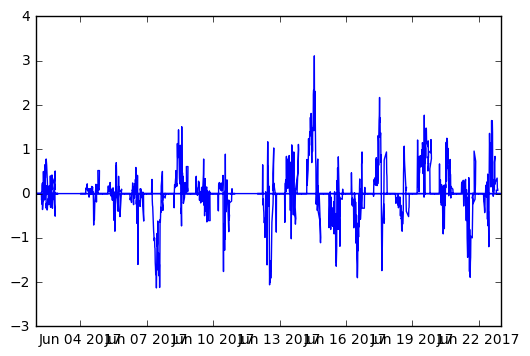

In [32]:

# load dataset
series = dataset.copy()
# seasonal difference
X = series
values_in_day= 96

differenced = difference(X, values_in_day)
plot(dataset.index[96:],differenced)
differ=pd.Series(differenced,index=dataset.index[96:])
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(differ, order=(2,1,0))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

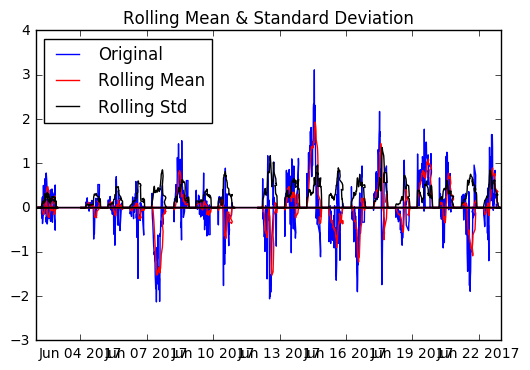

Results of Dickey-Fuller Test:
Test Statistic                -6.420462e+00
p-value                        1.796898e-08
#Lags Used                     2.500000e+01
Number of Observations Used    1.991000e+03
Critical Value (5%)           -2.862993e+00
Critical Value (1%)           -3.433639e+00
Critical Value (10%)          -2.567543e+00
dtype: float64


In [33]:

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput
diff=np.log(differ)
diff.fillna(method='pad',inplace='True')
from numpy import inf

diff[diff==(-inf)]=-100
diff[diff==(inf)]=100
test_stationarity(differ)

In [34]:
print 'The above differenced series is stationary'

The above differenced series is stationary


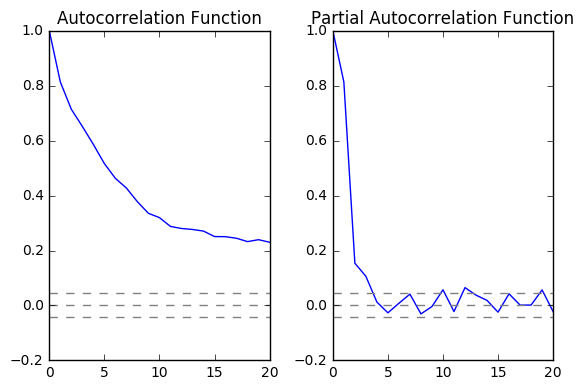

In [35]:
#Making ACF and PACF plots

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
lag_acf = acf(differ, nlags=20)
lag_pacf = pacf(differ, nlags=20, method='ols')
#Plot ACF: 

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(differ)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(differ)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(differ)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(differ)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()



In [36]:
# MODEL 2-implementing ARIMA on log differenced series

from statsmodels.tsa.arima_model import ARIMA
# fit model
model2 = ARIMA(diff, order=(2,1,0))
model2_fit = model2.fit(disp=0)
# print summary of fit model
print(model2_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2016
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -8513.093
Method:                       css-mle   S.D. of innovations             16.508
Date:                Wed, 05 Jul 2017   AIC                          17034.187
Time:                        07:33:41   BIC                          17056.622
Sample:                    06-02-2017   HQIC                         17042.421
                         - 06-23-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.22e-16      0.313  -7.09e-16      1.000      -0.614       0.614
ar.L1.D.y     -0.1252      0.022     -5.627      0.000      -0.169      -0.082
ar.L2.D.y     -0.0481      0.022     -2.162      0.0

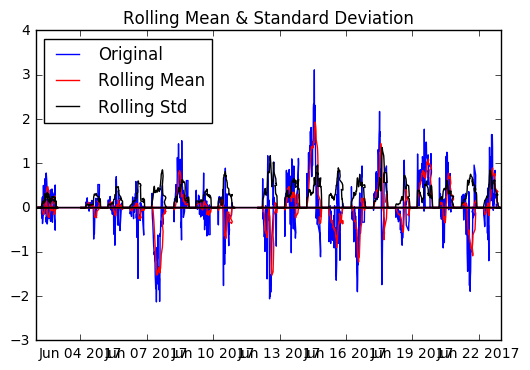

Results of Dickey-Fuller Test:
Test Statistic                -6.420462e+00
p-value                        1.796898e-08
#Lags Used                     2.500000e+01
Number of Observations Used    1.991000e+03
Critical Value (5%)           -2.862993e+00
Critical Value (1%)           -3.433639e+00
Critical Value (10%)          -2.567543e+00
dtype: float64


In [37]:
test_stationarity(differ)

In [38]:
#So i can do with either the differenced series or log of difference series.Ill take the normal differenced series

In [81]:
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=384)[0]
forecast
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
    values_in_day= 96
    
    dataset= X[0:2496]
    validation=X[2496:]
    differenced = difference(dataset, values_in_day)
    
    differ=pd.Series(differenced,index=dataset.index[96:])
    
    train=differ
       
    history = [x for x in train]
    # make predictions
    predictions = list()

    model = ARIMA(history, order=arima_order)
    model_fit = model.fit(disp=0)
    forecast= model_fit.forecast(steps=96*4)[0]

    history = [x for x in dataset]
    # invert the differenced forecast to something usable
    inverted_forecast=list()    
    day = 1
    for yhat in forecast:
        inverted = inverse_difference(history, yhat, values_in_day)
        history.append(inverted)
        inverted_forecast.append(inverted)
        
        
    predictions=pd.Series(inverted_forecast,index=validation.index)
    error = mean_squared_error(validation, predictions)
    return error



# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	a=dataset
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(a, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 

# evaluate parameters
p_values = [0, 1, 2,3, 4]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(a, p_values, d_values, q_values)


ARIMA(0, 0, 0) MSE=0.208
ARIMA(0, 0, 1) MSE=0.208
ARIMA(0, 0, 2) MSE=0.208
ARIMA(0, 1, 0) MSE=0.214
ARIMA(0, 1, 1) MSE=0.214
ARIMA(0, 1, 2) MSE=0.214
ARIMA(0, 2, 0) MSE=0.214
ARIMA(0, 2, 1) MSE=0.218
ARIMA(1, 0, 0) MSE=0.208
ARIMA(1, 0, 1) MSE=0.207
ARIMA(1, 0, 2) MSE=0.208
ARIMA(1, 1, 0) MSE=0.214
ARIMA(1, 1, 1) MSE=0.207
ARIMA(1, 1, 2) MSE=0.234
ARIMA(1, 2, 0) MSE=0.214
ARIMA(2, 0, 0) MSE=0.207
ARIMA(2, 0, 1) MSE=0.208
ARIMA(2, 0, 2) MSE=0.208
ARIMA(2, 1, 0) MSE=0.214
ARIMA(2, 1, 1) MSE=0.235
ARIMA(2, 1, 2) MSE=0.233
ARIMA(2, 2, 0) MSE=0.214
ARIMA(3, 0, 0) MSE=0.207
ARIMA(3, 0, 1) MSE=0.208
ARIMA(3, 0, 2) MSE=0.208
ARIMA(3, 1, 0) MSE=0.214
ARIMA(3, 1, 1) MSE=0.234
ARIMA(3, 1, 2) MSE=0.235
ARIMA(3, 2, 0) MSE=0.214
ARIMA(3, 2, 1) MSE=0.218
ARIMA(4, 0, 0) MSE=0.208
ARIMA(4, 0, 2) MSE=0.207
ARIMA(4, 1, 0) MSE=0.214
ARIMA(4, 1, 1) MSE=0.234
ARIMA(4, 1, 2) MSE=0.234
ARIMA(4, 2, 0) MSE=0.214
ARIMA(4, 2, 1) MSE=0.218
Best ARIMA(1, 1, 1) MSE=0.207


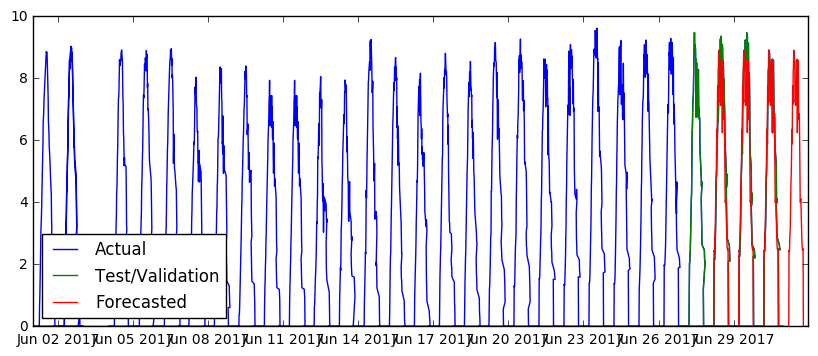

In [86]:
#Predicting out of sample

values_in_day=96
init=a.copy()
differenced = difference(a, values_in_day)
    
differ=pd.Series(differenced,index=a.index[96:])
    
train=differ
       
history = [x for x in train]
# make predictions
predictions = list()

model = ARIMA(history, order=(3,1,0))
model_fit = model.fit(disp=0)
forecast= model_fit.forecast(steps=96*4)[0]

values_in_day=96
hist = [x for x in init]
# invert the differenced forecast to something usable
inverted_fore=list()    
k=0
for yhat in forecast:
    inverted = inverse_difference(hist, yhat, values_in_day)
    hist.append(inverted)
    k+=1
    inverted_fore.append(inverted)
        
forin=pd.date_range(start ='2017-06-28 00:00:00', periods =96*4, freq = '15T')  

pred=pd.Series(inverted_fore,index=forin)
pred[pred<0]=0


pyplot.figure(figsize=(10,4))
pyplot.plot(a,color='Blue',label='Actual')
pyplot.plot(validation,color='Green',label='Test/Validation')
pyplot.plot(pred, color='red',label='Forecasted')
pyplot.legend(loc='Best')
pyplot.show()

In [84]:

def predict(X,arima_order):
    # prepare training dataset
    values_in_day= 96
    
    dataset= X[0:2496]
    validation=X[2496:]
    differenced = difference(dataset, values_in_day)

    differ=pd.Series(differenced,index=dataset.index[96:])
    
    train=differ
       
    history = [x for x in train]
    # make predictions
    predictions = list()

    model = ARIMA(history, order=arima_order)
    model_fit = model.fit(disp=0)
    forecast= model_fit.forecast(steps=96*4)[0]

    history = [x for x in dataset]
    # invert the differenced forecast to something usable
    inverted_forecast=list()    
    day = 1
    for yhat in forecast:
        inverted = inverse_difference(history, yhat, values_in_day)
        history.append(inverted)
        inverted_forecast.append(inverted)
        
        
    predictions=pd.Series(inverted_forecast,index=validation.index)
    return predictions

fore=predict(a,(3,1,0))
fore[fore<0.01]=0
forecast=pd.Series(fore)
print forecast


2017-06-27 00:15:00    0.000000
2017-06-27 00:30:00    0.000000
2017-06-27 00:45:00    0.000000
2017-06-27 01:00:00    0.000000
2017-06-27 01:15:00    0.000000
2017-06-27 01:30:00    0.000000
2017-06-27 01:45:00    0.000000
2017-06-27 02:00:00    0.000000
2017-06-27 02:15:00    0.000000
2017-06-27 02:30:00    0.000000
2017-06-27 02:45:00    0.000000
2017-06-27 03:00:00    0.000000
2017-06-27 03:15:00    0.000000
2017-06-27 03:30:00    0.000000
2017-06-27 03:45:00    0.000000
2017-06-27 04:00:00    0.000000
2017-06-27 04:15:00    0.000000
2017-06-27 04:30:00    0.000000
2017-06-27 04:45:00    0.000000
2017-06-27 05:00:00    0.000000
2017-06-27 05:15:00    0.000000
2017-06-27 05:30:00    1.990000
2017-06-27 05:45:00    1.950000
2017-06-27 06:00:00    1.990000
2017-06-27 06:15:00    2.120000
2017-06-27 06:30:00    2.390000
2017-06-27 06:45:00    2.600000
2017-06-27 07:00:00    3.130000
2017-06-27 07:15:00    3.760000
2017-06-27 07:30:00    4.230000
                         ...   
2017-06-

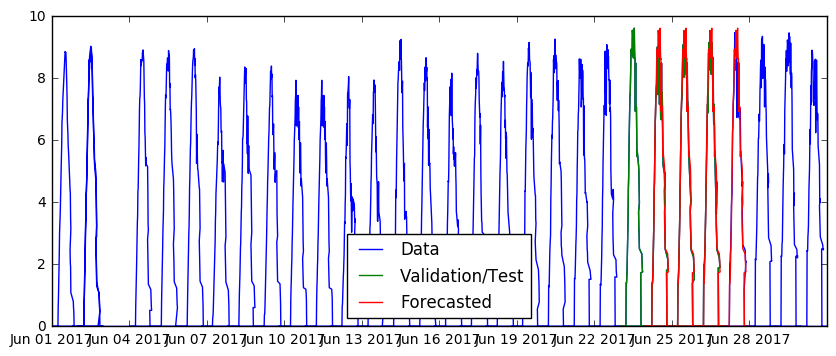

In [75]:
pyplot.figure(figsize=(10,4))
pyplot.plot(a,label='Data')
pyplot.plot(validation,color='Green',label='Validation/Test')
pyplot.plot(forecast, color='red',label='Forecasted')
pyplot.legend(loc='Best')

pyplot.show()
